# 从单因子到策略

## 取因子
### 使用技术指标构建单因子

In [15]:
from jqlib import *
from jqfactor import *

import pandas as pd
import jqdata as jq


def get_stocks_kdj(security_list, end_date):
    """ 获取股票列表的kdj"""
    rsis = pd.Series(RSI(security_list, check_date='2020-01-01', N1=6)).dropna()
    rsis = rsis.sort_values(ascending=True)
    return rsis

end_date = '2022-05-01'
security_list = get_index_stocks('000905.XSHG', date=end_date)
rsis = get_stocks_kdj(security_list, end_date)
rsis

/opt/conda/lib/python3.6/site-packages/jqlib/technical_analysis.py:595: UserWarning: 股票 001203.XSHE 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。
  __warn("股票 %s 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。" % str(stock))
/opt/conda/lib/python3.6/site-packages/jqlib/technical_analysis.py:595: UserWarning: 股票 002985.XSHE 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。
  __warn("股票 %s 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。" % str(stock))
/opt/conda/lib/python3.6/site-packages/jqlib/technical_analysis.py:595: UserWarning: 股票 003022.XSHE 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。
  __warn("股票 %s 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。" % str(stock))
/opt/conda/lib/python3.6/site-packages/jqlib/technical_analysis.py:595: UserWarning: 股票 003035.XSHE 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。
  __warn("股票 %s 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。" % str(stock))
/opt/conda/lib/python3.6/site-packages/jqlib/technical_analysis.py:595: UserWarning: 股票 300869.XSHE 输入数据全是 NaN，该股票可能已退市、未上市或刚上市，返回 NaN 值数据。
  __warn("股票 %s 

300168.XSHE    23.974340
002138.XSHE    26.554558
600764.XSHG    26.969893
603927.XSHG    27.011031
600903.XSHG    27.907259
603228.XSHG    30.988576
600297.XSHG    31.105517
002266.XSHE    31.404296
002382.XSHE    31.671942
600195.XSHG    33.065151
600536.XSHG    33.917415
300474.XSHE    34.502909
000039.XSHE    34.649756
000967.XSHE    35.004867
300315.XSHE    35.263196
000690.XSHE    35.515815
300115.XSHE    36.352526
603983.XSHG    36.897449
603605.XSHG    37.477366
600521.XSHG    38.332267
300182.XSHE    38.409189
603444.XSHG    38.486844
300001.XSHE    38.940962
002191.XSHE    40.540987
601860.XSHG    40.584382
601975.XSHG    40.808992
000050.XSHE    40.866206
002273.XSHE    41.224659
002416.XSHE    41.231859
300285.XSHE    41.582870
                 ...    
000009.XSHE    82.057322
002250.XSHE    82.347618
000090.XSHE    82.756073
000898.XSHE    83.133018
600546.XSHG    83.583741
002030.XSHE    83.643518
600528.XSHG    83.648180
000877.XSHE    83.792338
600095.XSHG    84.095713


### 使用聚宽因子库数据构建单因子

In [5]:
factor_name = 'book_to_price_ratio'
check_date = '2019-10-15'
stocks = get_index_stocks('000905.XSHG')

far = get_factor_values(stocks, factors=[factor_name], end_date=check_date, count=1)[factor_name].T
far = pd.Series(far[str(check_date)]).sort_values(ascending=True)
far[:5]

code
603927.XSHG   -1.769274
300357.XSHE   -1.768804
600536.XSHG   -1.744246
603127.XSHG   -1.738282
300630.XSHE   -1.728771
Name: 2019-10-15 00:00:00, dtype: float64

## 单因子分析

In [14]:
start_date = '2021-01-01'
end_date = '2022-05-01'
indexs = '000905.XSHG'
security_list = get_index_stocks(indexs, date=end_date)
factor = 'book_to_price_ratio'

# 获取单因子数据
factor_data = get_factor_values(security_list, factors=factor, start_date=start_date, end_date=end_date)[factor]
factor_data.head()

code,000009.XSHE,000012.XSHE,000021.XSHE,000027.XSHE,000028.XSHE,000031.XSHE,000039.XSHE,000046.XSHE,000050.XSHE,000060.XSHE,000062.XSHE,000089.XSHE,000090.XSHE,000156.XSHE,000158.XSHE,000400.XSHE,000401.XSHE,000402.XSHE,000415.XSHE,000488.XSHE,000513.XSHE,000519.XSHE,000528.XSHE,000537.XSHE,000540.XSHE,000547.XSHE,000553.XSHE,000559.XSHE,000563.XSHE,000581.XSHE,000598.XSHE,000623.XSHE,000629.XSHE,000630.XSHE,000636.XSHE,000656.XSHE,000671.XSHE,000685.XSHE,000686.XSHE,000690.XSHE,...,603290.XSHG,603317.XSHG,603355.XSHG,603379.XSHG,603444.XSHG,603456.XSHG,603515.XSHG,603568.XSHG,603589.XSHG,603605.XSHG,603613.XSHG,603638.XSHG,603650.XSHG,603707.XSHG,603708.XSHG,603712.XSHG,603719.XSHG,603786.XSHG,603858.XSHG,603866.XSHG,603868.XSHG,603883.XSHG,603885.XSHG,603893.XSHG,603927.XSHG,603983.XSHG,605358.XSHG,688002.XSHG,688005.XSHG,688006.XSHG,688029.XSHG,688065.XSHG,688088.XSHG,688099.XSHG,688188.XSHG,688208.XSHG,688289.XSHG,688321.XSHG,688521.XSHG,688536.XSHG
2021-01-04,-0.384465,-0.088486,-0.641848,1.411131,0.744026,1.769671,0.512207,2.345998,1.389677,0.537920,-0.128685,0.779621,0.975397,1.308708,0.392494,0.341602,0.773034,2.771707,2.771707,1.254400,-0.528538,0.382187,1.677235,2.650710,1.243059,-0.906358,2.252559,0.000034,0.980256,0.953223,1.141737,2.236421,0.126788,0.680047,-0.822680,1.161510,1.419490,2.061514,0.743874,0.538544,...,-1.337013,-1.187709,-0.574711,-0.096348,-1.075431,-1.101252,-0.754819,-0.771570,-0.936870,-1.234991,-1.062237,-1.247116,-1.030351,-1.091948,-0.718672,-1.178651,-1.168066,-1.023549,0.125077,-1.070037,-1.018820,-0.931892,0.128191,-1.195234,-1.063141,-1.010625,-1.307200,-1.262356,-0.885646,-1.214016,-1.100829,-0.582359,-1.128147,-1.144915,-1.159209,-1.177529,-1.143351,-1.118465,-1.212753,-1.177698
2021-01-05,-0.364425,-0.051475,-0.631962,1.531285,0.775978,1.771432,0.573040,2.346332,1.336934,0.569241,-0.107816,0.782017,1.048663,1.349955,0.419141,0.352380,0.785905,2.789752,2.789752,1.242960,-0.531311,0.362641,1.581513,2.703051,1.251882,-0.896127,2.095565,0.023932,0.995836,0.911820,1.158866,2.221736,0.131840,0.694116,-0.791819,1.051209,1.408707,2.073744,0.747185,0.564199,...,-1.314919,-1.155173,-0.574597,-0.063077,-1.046976,-1.082608,-0.743170,-0.737607,-0.937554,-1.225486,-1.016016,-1.232307,-1.018040,-1.069835,-0.690597,-1.149774,-1.156982,-0.989719,0.087081,-1.058202,-1.002033,-0.930028,0.178172,-1.173605,-1.048988,-1.001240,-1.288009,-1.238031,-0.825743,-1.190139,-1.061540,-0.556293,-1.106411,-1.121703,-1.136130,-1.125767,-1.133307,-1.108109,-1.190770,-1.162321
2021-01-06,-0.329132,0.003656,-0.613171,1.442189,0.787759,1.761398,0.443678,2.368264,1.385807,0.598016,-0.113089,0.806952,1.013221,1.408552,0.505129,0.361857,0.708278,2.802112,2.802112,1.194640,-0.548159,0.355126,1.580298,2.721768,1.279759,-0.894333,2.109423,0.055801,1.028706,0.887747,1.146763,2.242457,0.165581,0.705675,-0.764821,1.044977,1.378728,2.079060,0.773044,0.602965,...,-1.306012,-1.161839,-0.564483,-0.042532,-1.030861,-1.073264,-0.748225,-0.728709,-0.924949,-1.220584,-1.026069,-1.232775,-0.997811,-1.065055,-0.682364,-1.147739,-1.157711,-0.981417,0.093997,-1.052704,-0.992195,-0.932414,0.211834,-1.158732,-1.032555,-0.986166,-1.276476,-1.228777,-0.778483,-1.183877,-1.056618,-0.530691,-1.089490,-1.112248,-1.129375,-1.140677,-1.134080,-1.095345,-1.177403,-1.155243
2021-01-07,-0.327365,-0.006555,-0.581893,1.485071,0.833568,1.861295,0.365810,2.386701,1.391694,0.544354,-0.057349,0.841205,1.072066,1.437338,0.585089,0.338136,0.738904,2.826659,2.826659,1.081463,-0.515439,0.344849,1.477997,2.758920,1.315067,-0.876447,2.090253,0.093659,1.058203,0.926414,1.182863,2.205580,0.124443,0.616773,-0.728239,0.998109,1.378998,2.056074,0.752481,0.603327,...,-1.277824,-1.124531,-0.532120,-0.011209,-0.978140,-1.047231,-0.764367,-0.704360,-0.896392,-1.195585,-1.008015,-1.208750,-0.977852,-1.031698,-0.623986,-1.129185,-1.126599,-0.950139,0.141125,-1.028707,-0.971170,-0.911884,0.270773,-1.122942,-0.996657,-0.945552,-1.242001,-1.200500,-0.758902,-1.146928,-1.031888,-0

In [16]:
# 对因子进行分析
far = analyze_factor(
    factor_data,  # factor_data 为因子值的 pandas.DataFrame
    quantiles=10,
    periods=(1, 5, 10, 20),
    industry='jq_l1',
    weight_method='avg',
    max_loss=0.2
)

/opt/conda/lib/python3.6/site-packages/jqdata/apis/data.py:159: UserWarning: 不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），建议 get_price 传入 panel=False 参数
  warnings.warn("不建议继续使用panel（panel将在pandas未来版本不再支持，将来升级pandas后，您的策略会失败），"


分位数统计


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-1.698780,-0.933134,-1.202146,0.112727,16000,10.024058
2,-1.208238,-0.728287,-0.930205,0.089930,15989,10.017166
3,-0.893451,-0.504901,-0.686786,0.073357,15930,9.980202
4,-0.640974,-0.196663,-0.440692,0.085833,15969,10.004636
5,-0.371478,0.055743,-0.146830,0.092438,15930,9.980202
6,-0.087224,0.410850,0.155641,0.108075,15981,10.012154
7,0.216597,0.998429,0.580832,0.168086,15900,9.961407
8,0.578592,1.787277,1.139432,0.233404,15998,10.022805
9,1.120754,2.636891,1.811807,0.294658,15919,9.973311



-------------------------

收益分析


,period_1,period_5,period_10,period_20
Ann. alpha,0.147,0.149,0.156,0.157
beta,0.228,0.268,0.324,0.301
Mean Period Wise Return Top Quantile (bps),3.679,4.213,4.809,5.293
Mean Period Wise Return Bottom Quantile (bps),-10.246,-10.668,-10.071,-10.119
Mean Period Wise Spread (bps),13.925,15.089,15.056,15.897


<Figure size 432x288 with 0 Axes>

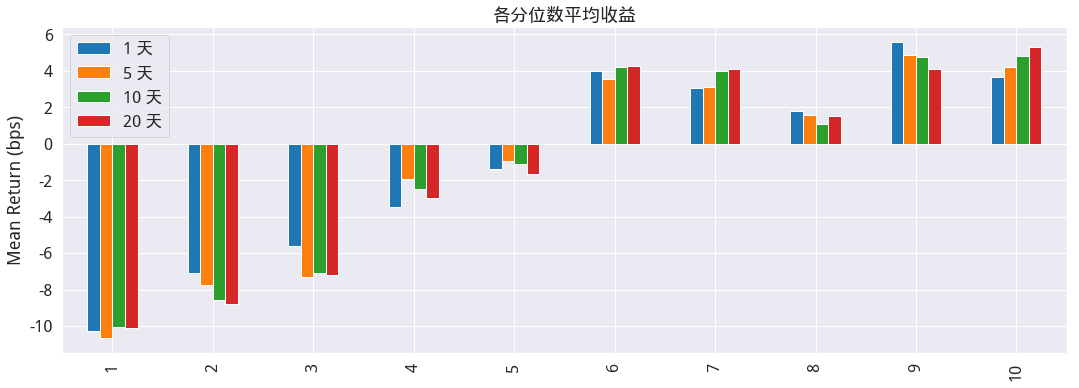

<Figure size 432x288 with 0 Axes>

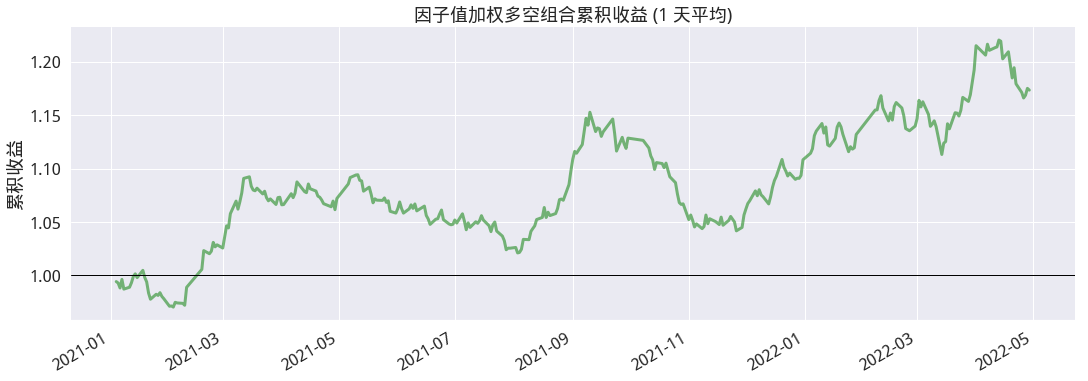

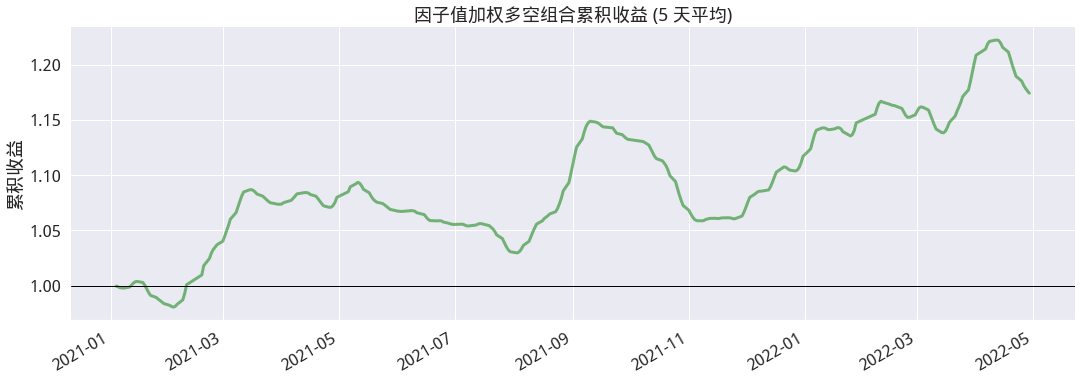

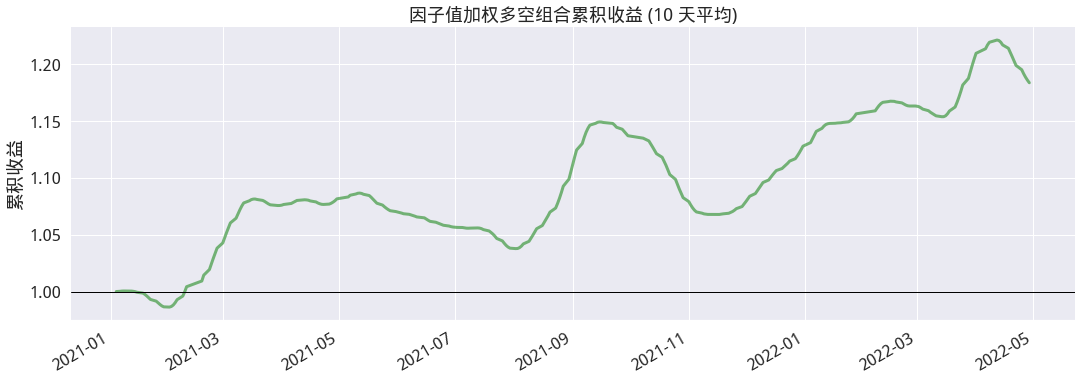

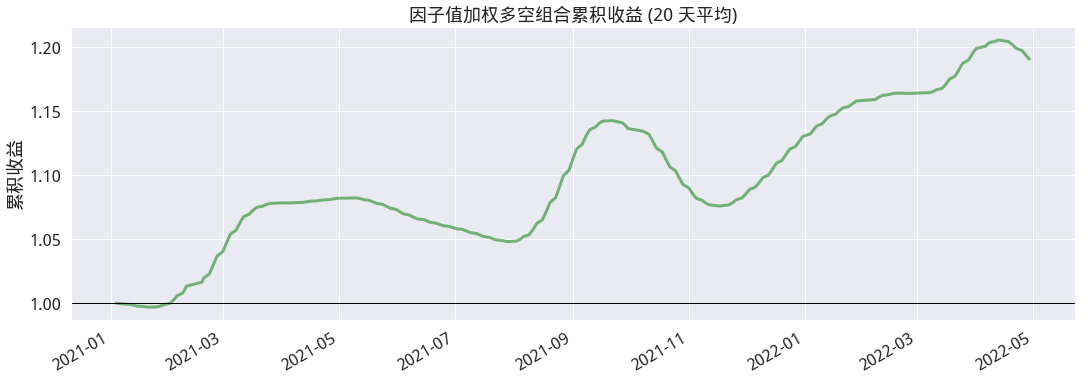

<Figure size 432x288 with 0 Axes>

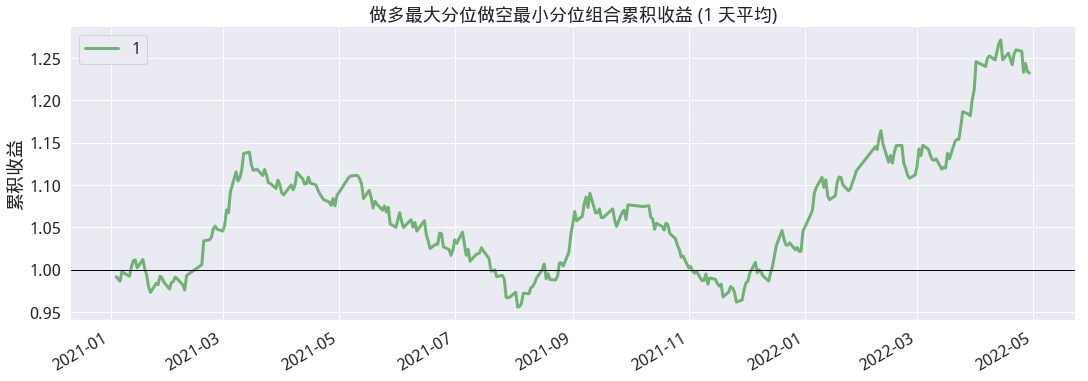

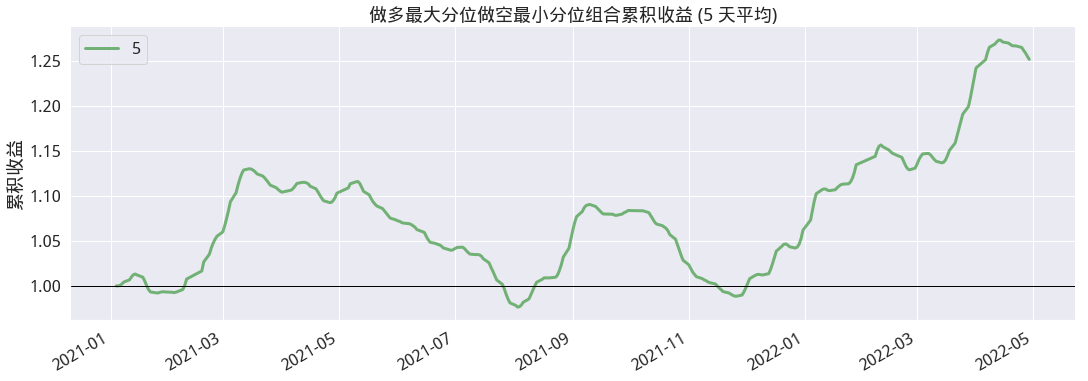

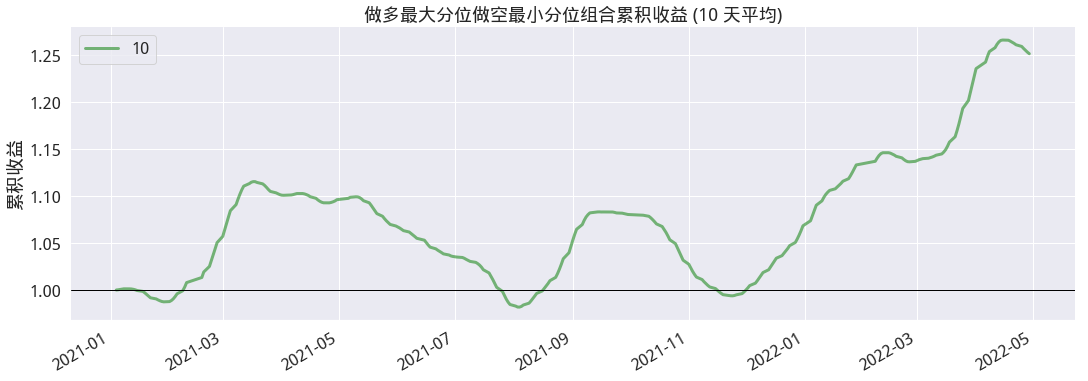

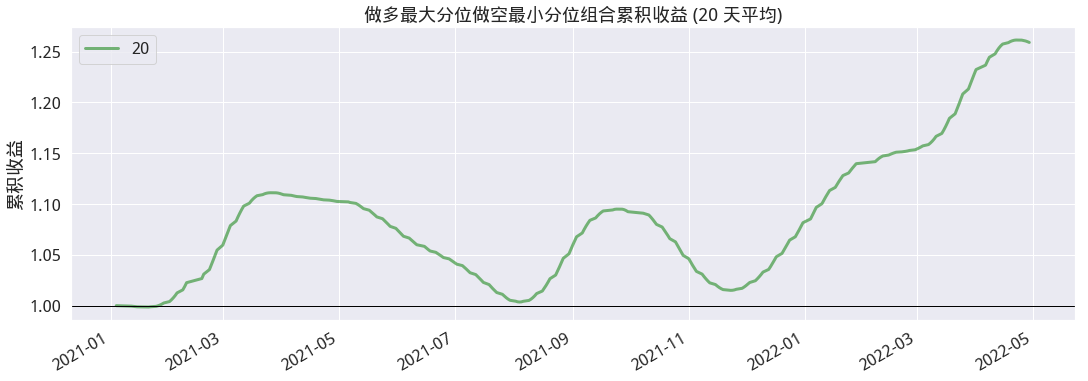

<Figure size 432x288 with 0 Axes>

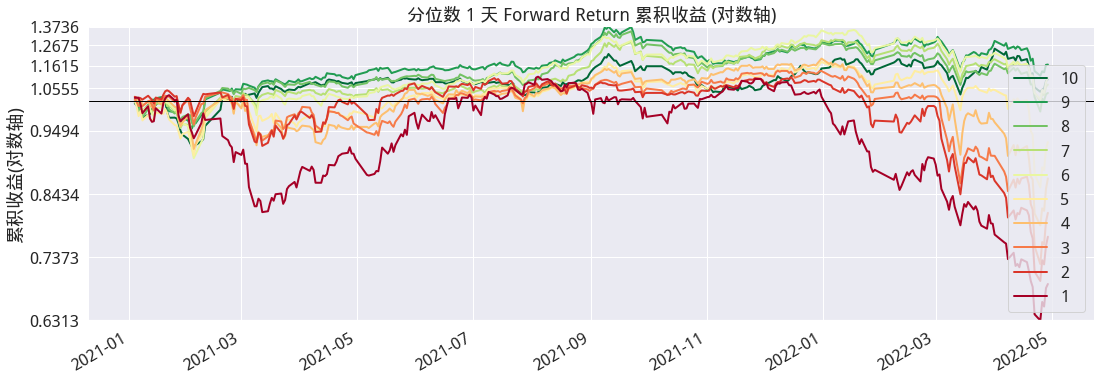

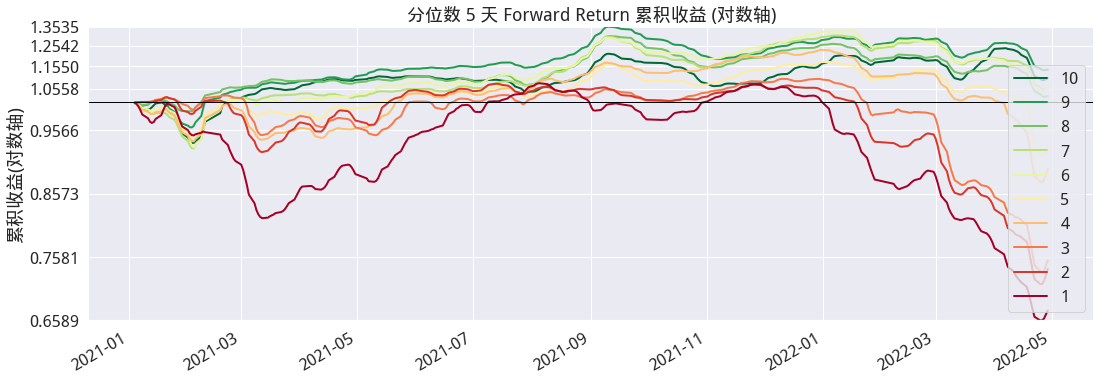

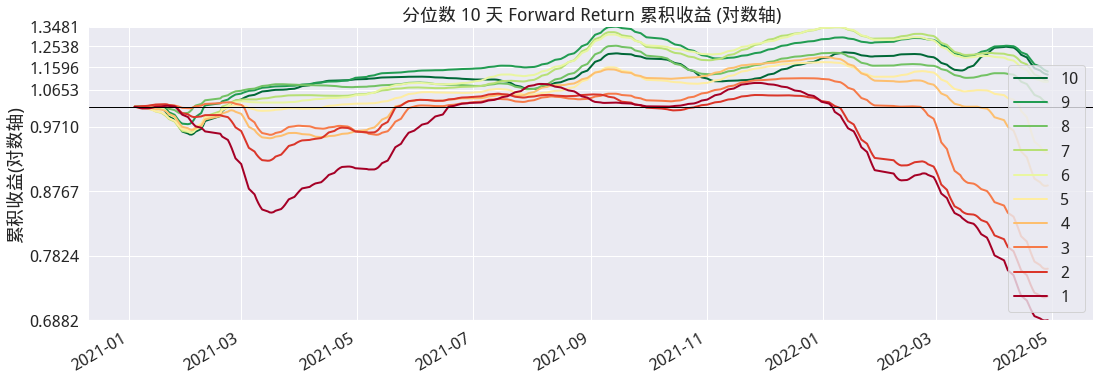

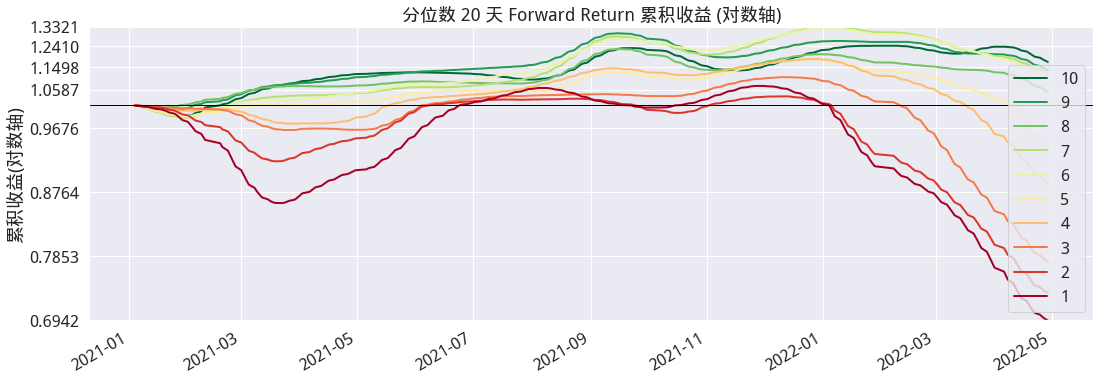

<Figure size 432x288 with 0 Axes>

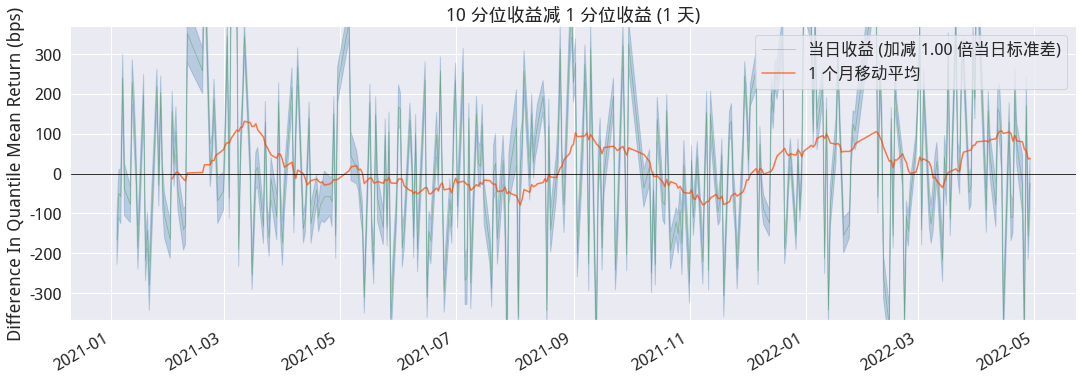

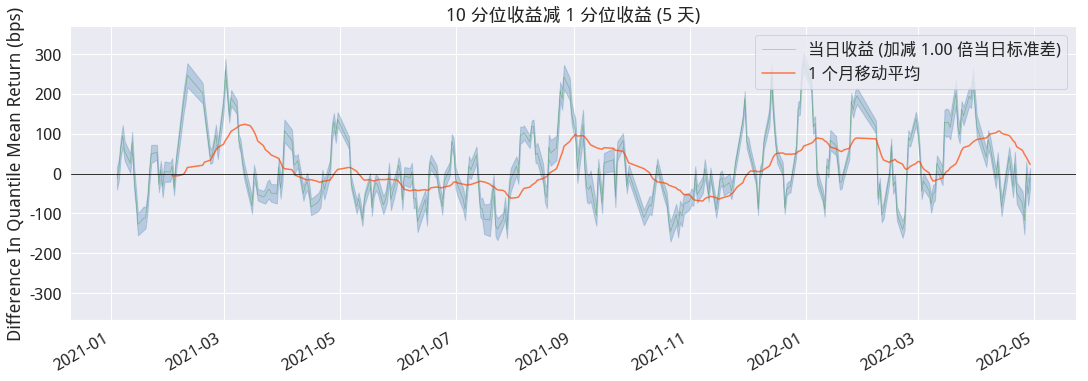

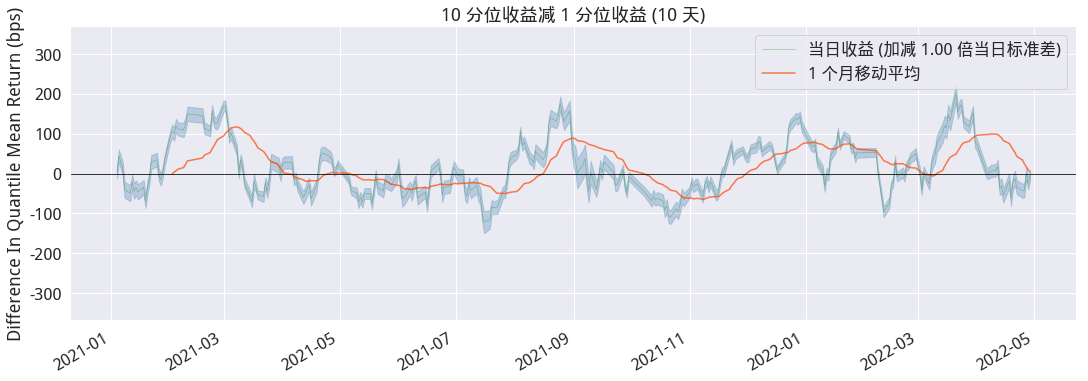

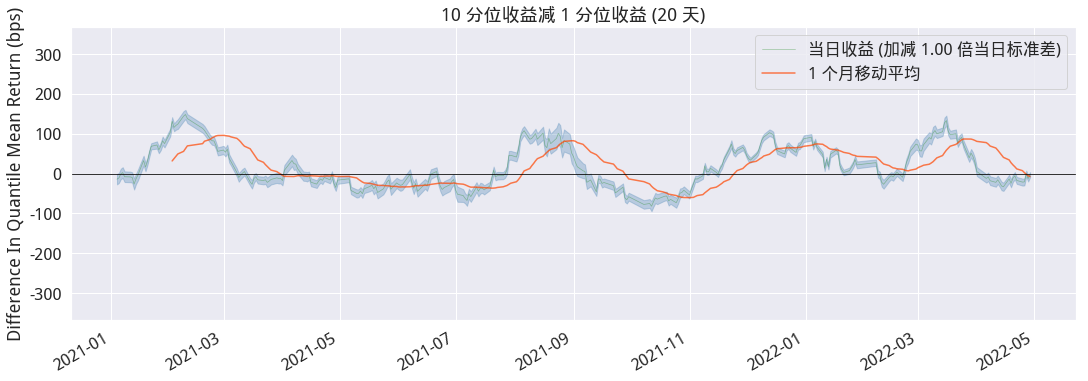


-------------------------

IC 分析


,period_1,period_5,period_10,period_20
IC Mean,0.040,0.064,0.088,0.118
IC Std.,0.232,0.243,0.248,0.267
IR,0.172,0.263,0.353,0.440
t-stat(IC),3.084,4.705,6.324,7.876
p-value(IC),0.002,0.000,0.000,0.000
IC Skew,0.082,0.324,0.174,0.097
IC Kurtosis,-0.841,-0.859,-0.933,-1.103


<Figure size 432x288 with 0 Axes>

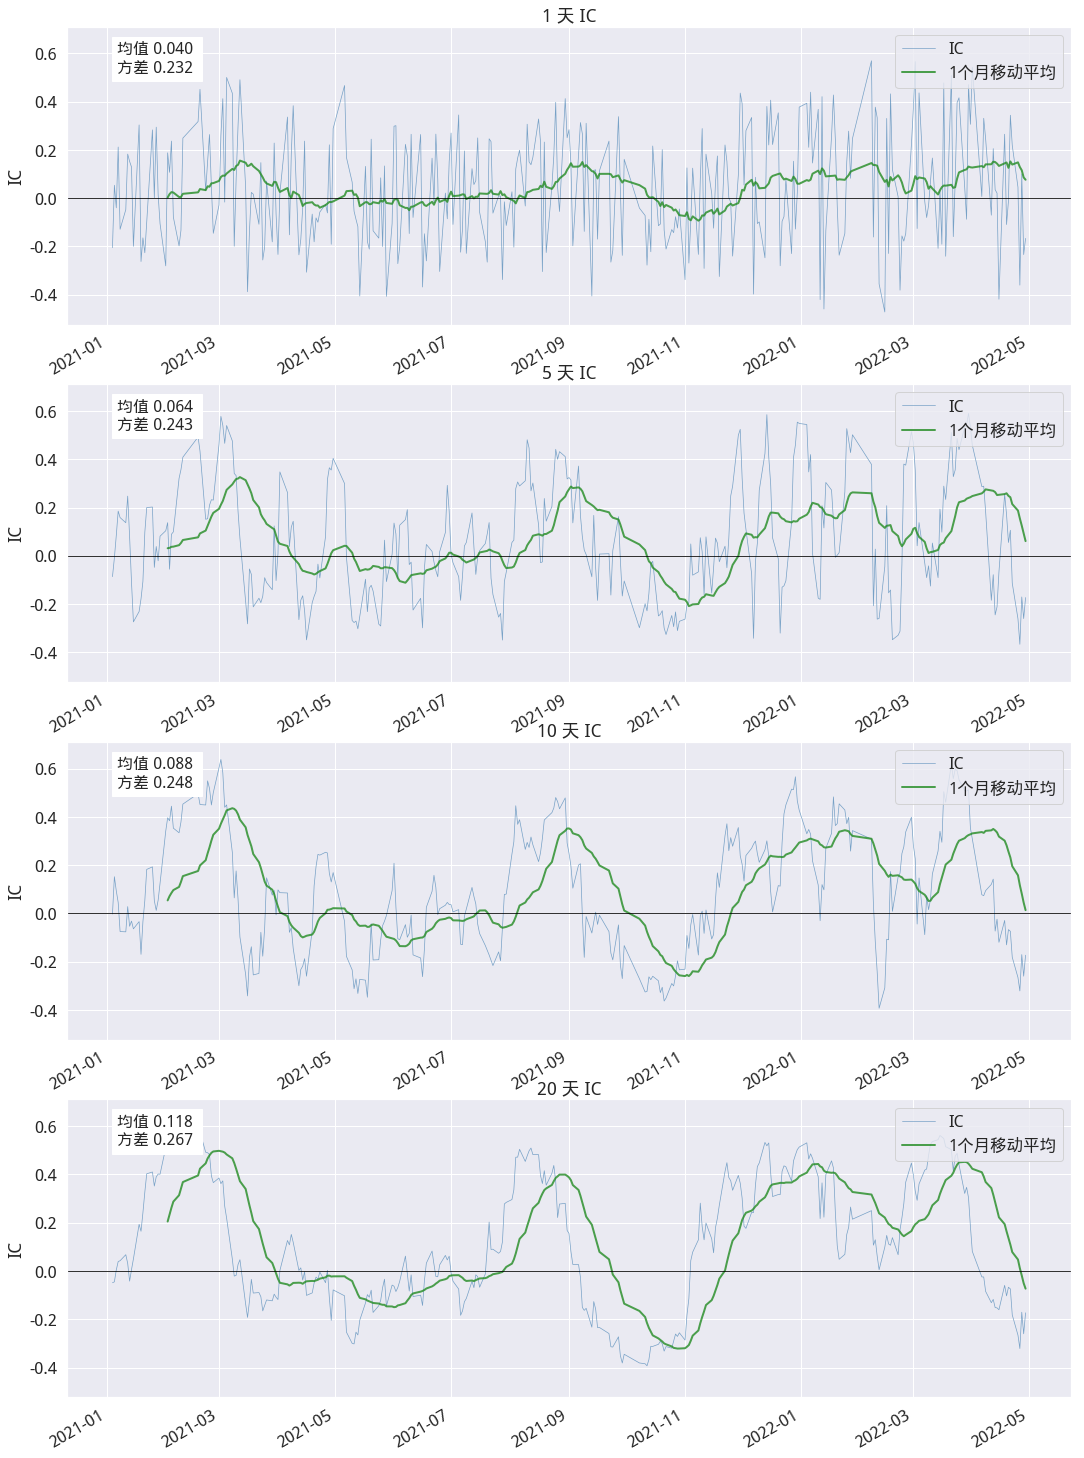

<Figure size 432x288 with 0 Axes>

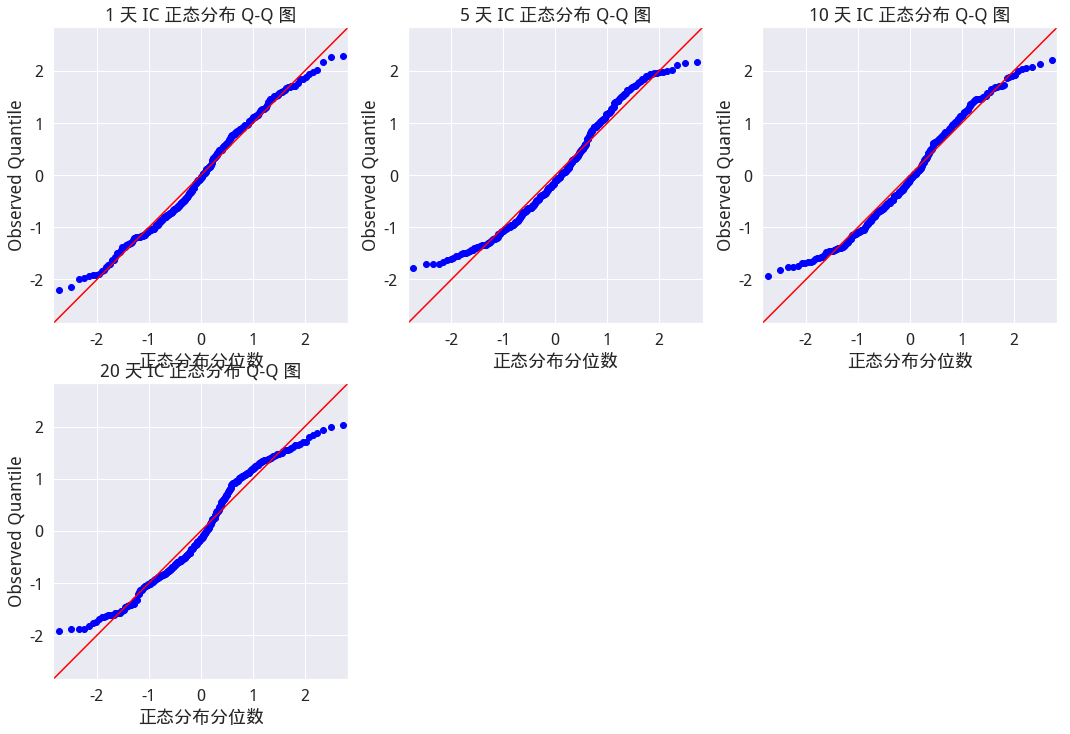

<Figure size 432x288 with 0 Axes>

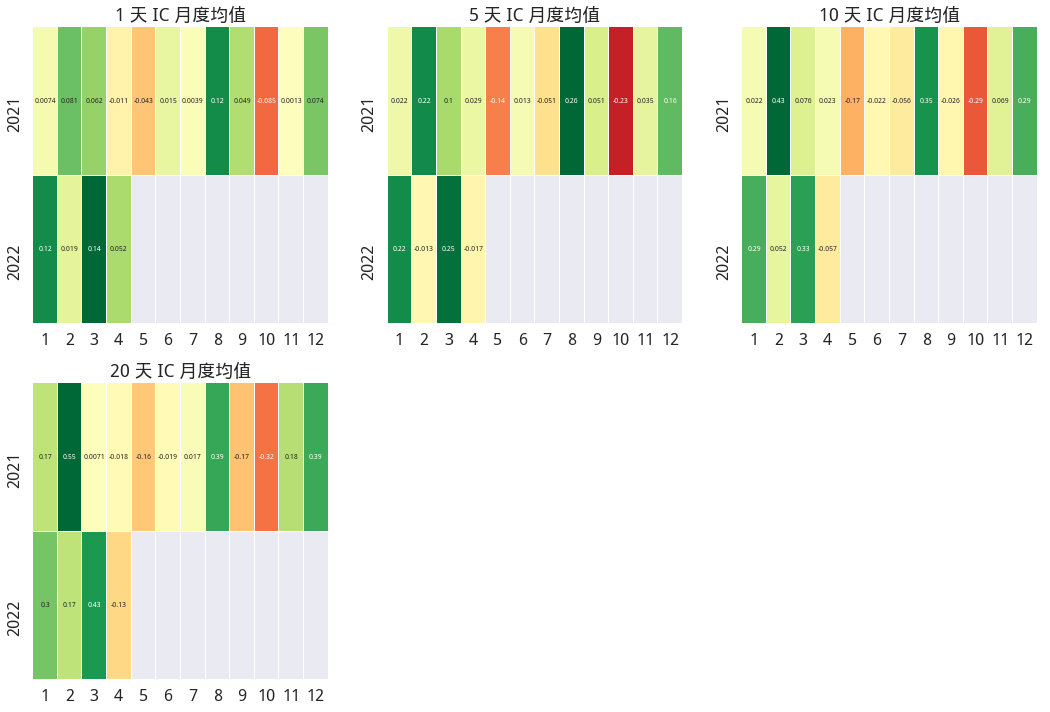


-------------------------

换手率分析


,period_1,period_10,period_20,period_5
Quantile 1 Mean Turnover,0.023,0.066,0.096,0.047
Quantile 2 Mean Turnover,0.053,0.168,0.234,0.117
Quantile 3 Mean Turnover,0.070,0.228,0.311,0.161
Quantile 4 Mean Turnover,0.083,0.259,0.357,0.187
Quantile 5 Mean Turnover,0.094,0.282,0.376,0.205
Quantile 6 Mean Turnover,0.093,0.279,0.367,0.202
Quantile 7 Mean Turnover,0.082,0.244,0.320,0.179
Quantile 8 Mean Turnover,0.074,0.214,0.284,0.158
Quantile 9 Mean Turnover,0.055,0.166,0.228,0.120
Quantile 10 Mean Turnover,0.020,0.064,0.090,0.046


,period_1,period_5,period_10,period_20
Mean Factor Rank Autocorrelation,0.999,0.997,0.994,0.989


<Figure size 432x288 with 0 Axes>

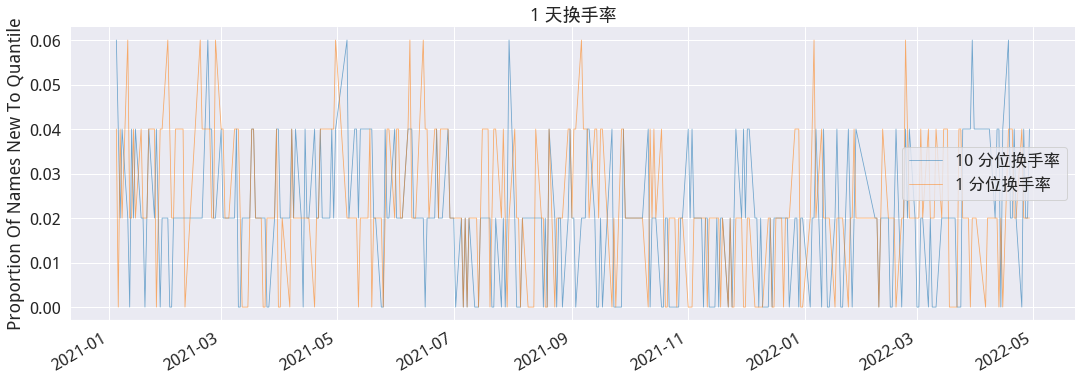

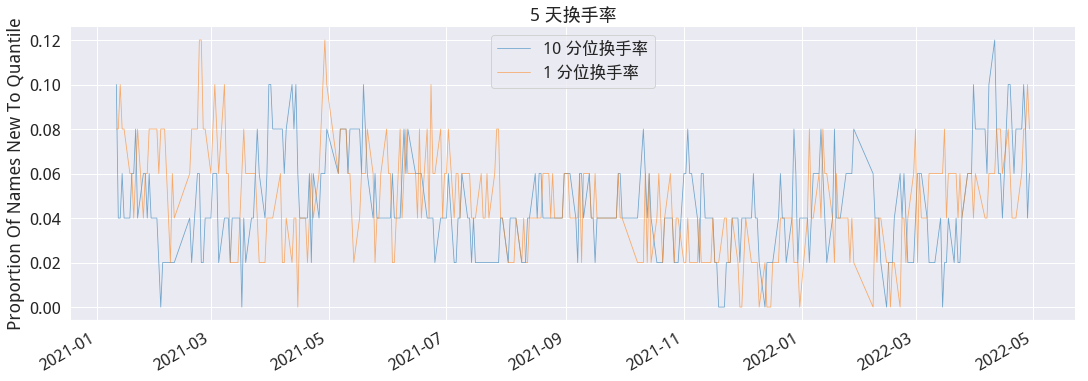

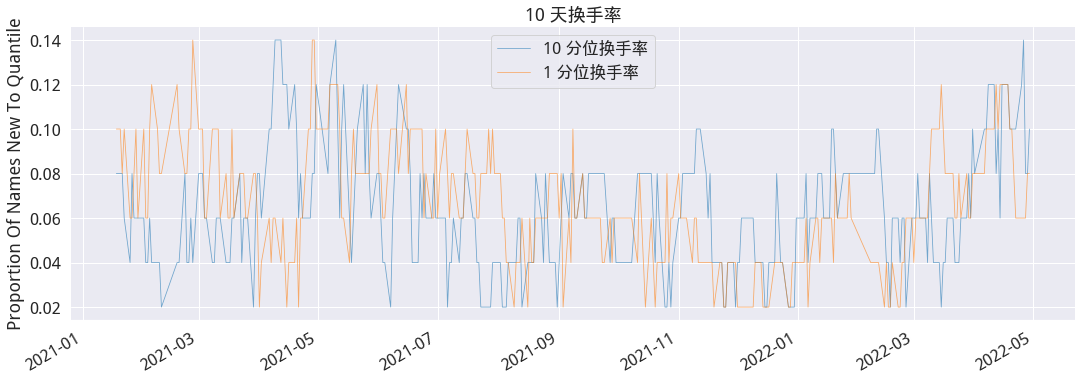

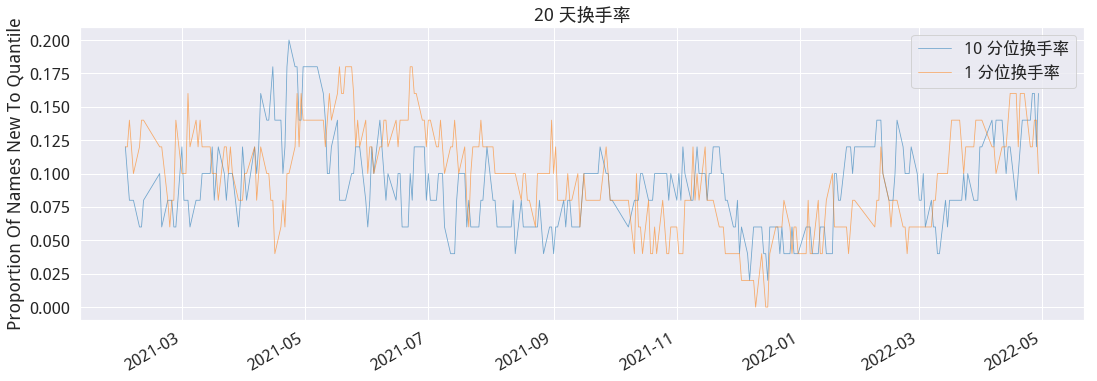

<Figure size 432x288 with 0 Axes>

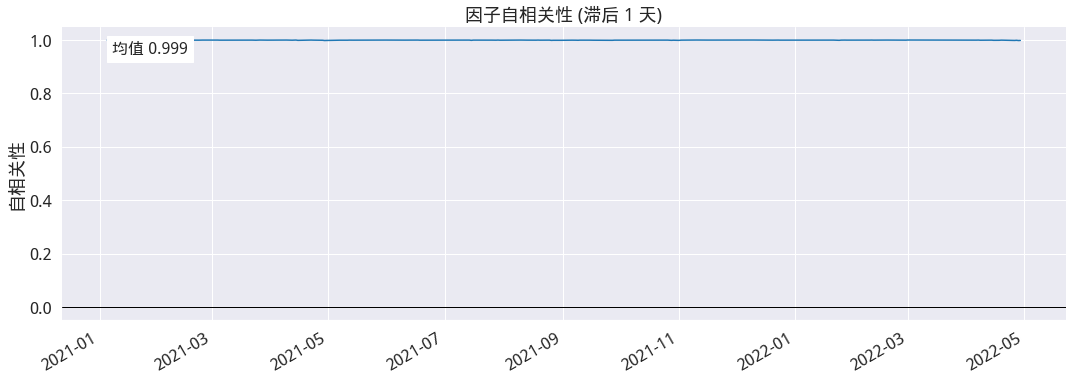

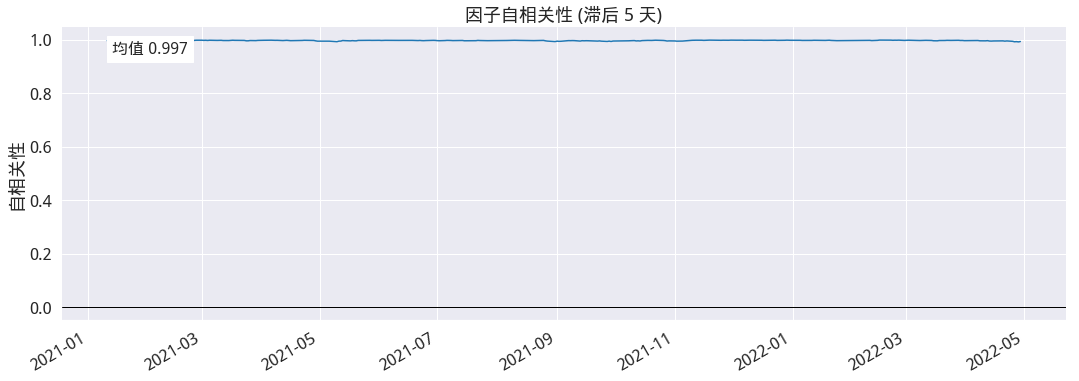

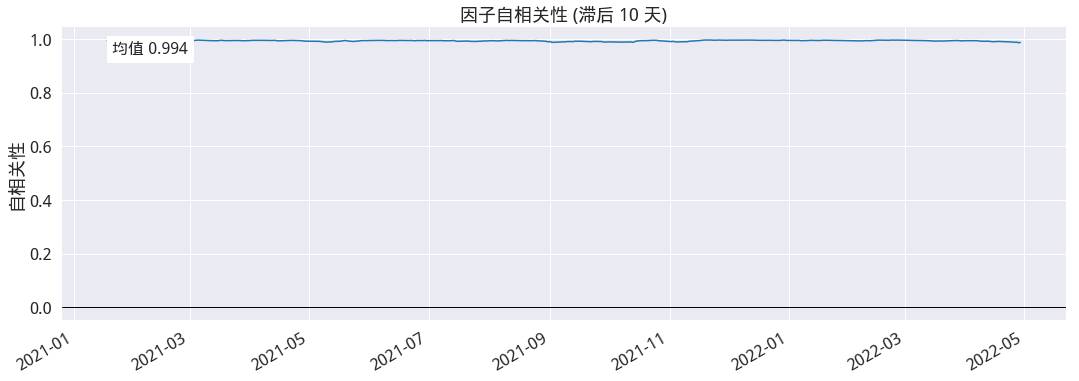

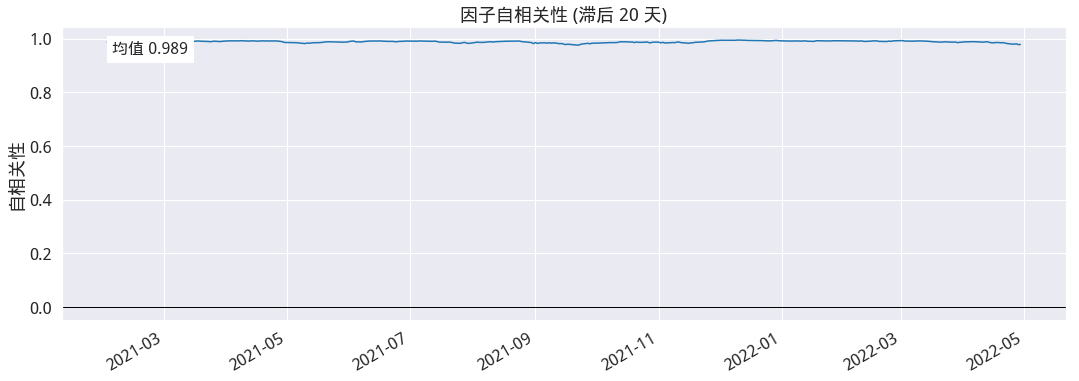


-------------------------



<Figure size 432x288 with 0 Axes>

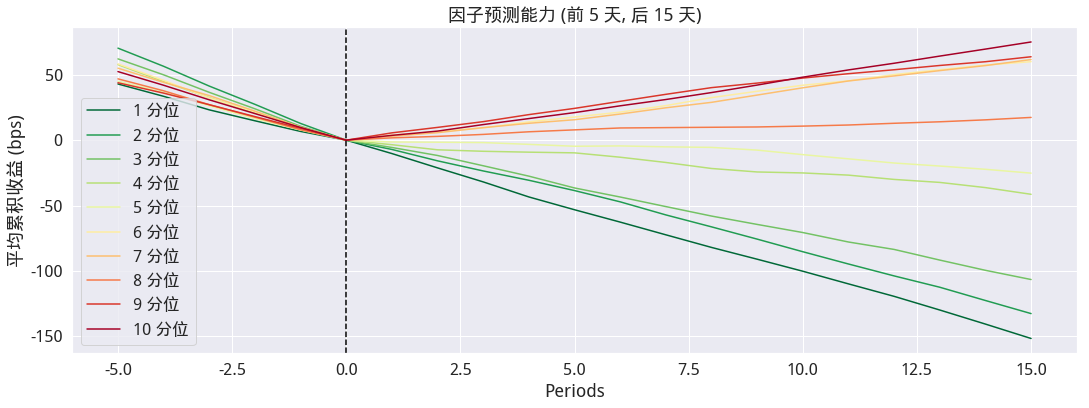

In [17]:
# 生成统计图表
far.create_full_tear_sheet(
    demeaned=False, group_adjust=False, by_group=False,
    turnover_periods=None, avgretplot=(5, 15), std_bar=False
)

In [22]:
'''
参考聚宽高频因子挖掘大赛比赛专用模板
'''
# 导入函数库
from jqdata import *
import numpy as np
import pandas as pd
import jqfactor
from jqfactor import get_factor_values

##################################### 初始化设置 ###############################################
# 初始化函数，设定基准等等
def initialize(context):
    # 设定500等权作为基准
    # g.benchmark = '000982.XSHG'
    g.benchmark = '000905.XSHG'
    set_benchmark(g.benchmark)
    # 开启动态复权模式(真实价格)
    set_option('use_real_price', True)

    ### 股票相关设定 ###
    # 股票类每笔交易时的手续费是：买入时佣金万分之三，卖出时佣金万分之三加千分之一印花税, 每笔交易佣金最低扣5块钱
    # set_order_cost(OrderCost(open_tax=0, close_tax=0.001, open_commission=0.0003, close_commission=0.0003, close_today_commission=0, min_commission=5), type='stock')
    set_order_cost(OrderCost(open_tax=0, close_tax=0, open_commission=0, close_commission=0, close_today_commission=0, min_commission=0), type='stock')
    # 滑点
    # 为股票设定滑点为百分比滑点
    # set_slippage(PriceRelatedSlippage(0.00246),type='stock')
    set_slippage(FixedSlippage(0.0))

    # 初始化因子设置
    factor_analysis_initialize(context)
    # 定义股票池
    set_stockpool(context)

    # 策略运行了几天
    g.days = 0
    # 每次购买股票池10%的股票
    g.buy_num = int(len(g.stock_pool)*0.1)

    # 聚宽因子库因子名称
    g.factor_name = 'book_to_price_ratio'
    # 调仓周期（1, 5, 10, 20）
    g.period = 20
    # 买1分位还是10分位，等于1时买一分位因子值小的，不为1，买十分位因子值大的
    g.quantile = 10
    # 几点卖出
    g.sell_time = '14:55'
    # 几点买入
    g.buy_time = '09:31'

    # 运行函数（reference_security为运行时间的参考标的；传入的标的只做种类区分，因此传入'000300.XSHG'或'510300.XSHG'是一样的）
    run_daily(set_stockpool, time='09:10', reference_security='000300.XSHG')
    run_daily(before_market_open, time='09:10', reference_security='000300.XSHG')
    run_daily(sell, time=g.sell_time, reference_security='000300.XSHG')
    run_daily(buy, time=g.buy_time, reference_security='000300.XSHG')
    run_daily(after_market_close, time='15:30', reference_security='000300.XSHG')

# 定义股票池
def set_stockpool(context):
    # 获取股票池
    stocks = get_index_stocks(g.benchmark, context.previous_date)
    paused_series = get_price(stocks,end_date=context.current_dt,count=1,fields='paused')['paused'].iloc[0]
    # g.stock_pool 为因子挖掘的对象股票池，用户不可对此股票池进行二次筛选
    g.stock_pool =  paused_series[paused_series==False].index.tolist()

# 定义需要用到的全局变量
def factor_analysis_initialize(context):
    # g.weight_method 为加权方式, "avg"按平均加权
    g.weight_method = "avg"
    weight_method_model = {"avg": "平均加权"}
    # 持仓股票数量
    # g.buy_num = 4 
    # g.sell为卖出股票权重列表
    g.sell = pd.Series(dtype=float)
    # g.buy为买入股票权重列表
    g.buy = pd.Series(dtype=float)
    #g.ind为行业分类
    g.ind = 'jq_l1'
    # g.d 为获取昨天的时间点
    g.d = context.previous_date

####################################### 定义因子相关 ###############################################
# 定义因子
def calc_factor(context):
    '''
    用户自定义因子，要求返回一个 Series，index为股票code，value为因子值
    我们会买入「因子值最小」的20只，如果您想使用买入「因子值最大」的20只股票，只需将您的结果「乘以-1.0」即可，详见函数下方 return 部分
    自定义因子，ascending=True，far没有乘-1，买入的是far[:3]，因子数最小的
    自定义因子，ascending=True，far乘-1，买入的是far[-3:]，因子数最大的
    '''
    # 获取股票池,g.stock_pool为因子挖掘的对象股票池，用户不可对此股票池进行二次筛选
    stocks = g.stock_pool
    check_date = context.previous_date

    far = get_factor_values(stocks, factors=[g.factor_name], end_date=check_date, count=1)[g.factor_name].T
    far = pd.Series(far[str(check_date)]).sort_values(ascending=True)


    # ###### 中性化等数据处理模块，用户根据需要决定是否使用 ######
    # # 中位数去极值
    # far = jqfactor.winsorize_med(far, scale=3, inclusive=True, inf2nan=True)
    # # 行业市值对数中性化
    # far = jqfactor.neutralize(far, how=['market_cap'], date=g.d)
    # # zscore标准化
    # far = jqfactor.standardlize(far, inf2nan=True)
    # 去除 nan 值
    far = far.dropna()

    print(far[:3])
    print(far[-3:])
    print('='*50)

    # 买一分位，因子值小的
    if g.quantile == 1:
        far = far
    # 买十分位，因子值小的
    else:
        far = far * -1.0

    #如想选择因子值最大的20只股票，请注释上方`return far`。使用下方的return：
    return far

####################################### 盘前盘后运行函数 ###############################################
# 开盘前运行函数
def before_market_open(context):
    '''
    盘前运行函数，可选实现
    '''
    pass

## 收盘后运行函数
def after_market_close(context):
    '''
    盘后运行函数，可选实现
    '''
    print('period {0}, buy_num {1}'.format(g.period, g.quantile))

    print('#'*50)

##################################### 交易部分 ###############################################

# 对因子进行分析计算出每日买入或卖出的股票
def fac(context):
    # 获取因子值
    far = calc_factor(context)
    # 买入股票池
    try:
        buy = far.sort_values(ascending=True).index.tolist()[:g.buy_num]
    except:
        buy = far.order(ascending=True).index.tolist()[:g.buy_num]
    # 买卖股票权重
    if (g.weight_method == "avg") and (len(buy) > 0):
        buy_weight = pd.Series(1. / len(buy), index=buy)
    else:
        buy_weight = pd.Series([])
        print('invalid weight_method')

    return buy_weight

# 买入股票
def buy(context):
    if g.days == 0:
        # 计算买入卖出的股票和权重
        try:
            factor_analysis_initialize(context)
            g.buy = fac(context)
        except ValueError:
            if "Bin edges must be unique" in str(e):
                log.error("计算因子值过程出错！")
            else:
                raise
        long_cash = context.portfolio.total_value
        if g.buy is not None:
            for s in g.buy.index:
                order_target_value(s, g.buy.loc[s] * 0.98 * long_cash)
    # 持仓天数加1
    g.days += 1

# 卖出股票
def sell(context):
    print("持仓了{0}天了".format(g.days))
    # 符合持仓天数后卖出
    if g.days%g.period == 0:
        for s in context.portfolio.positions.keys():
            order_target_value(s, 0)
        # 卖出后置持仓天数为0
        g.days = 0
        
# 记得此处传入你自己的 algorithmId
out_algorithm_id = create_backtest('97d46fcf9f9ab93472c50fe143c652b9','2020-01-01', '2022-05-01', \
                    frequency="day",initial_cash=1000000)
out_algorithm_id

'0479d68e73d51a70f41dc5ad1722fcb6'

In [25]:
gt = get_backtest(out_algorithm_id)
gt.get_status()        # 获取回测状态

'done'

In [24]:
gt.get_params()        # 获取回测参数

{'algorithm_id': '97d46fcf9f9ab93472c50fe143c652b9',
 'end_date': '2022-05-01 23:59:59',
 'extras': {},
 'frequency': 'day',
 'initial_cash': '1000000',
 'initial_positions': [],
 'name': '这是一个简单的策略-16',
 'package_version': '1.0',
 'python_version': '2',
 'start_date': '2020-01-01 00:00:00'}

In [26]:
gt.

[{'benchmark_returns': 0.013586943255105455,
  'returns': 0.0,
  'time': '2020-01-02 16:00:00'},
 {'benchmark_returns': 0.011809851144125139,
  'returns': 0.012679807999999904,
  'time': '2020-01-03 16:00:00'},
 {'benchmark_returns': 0.007987150257043663,
  'returns': 0.006189807999999797,
  'time': '2020-01-06 16:00:00'},
 {'benchmark_returns': 0.01553735066811801,
  'returns': 0.010909807999999632,
  'time': '2020-01-07 16:00:00'},
 {'benchmark_returns': 0.0038422293718172185,
  'returns': -0.018000192000000248,
  'time': '2020-01-08 16:00:00'},
 {'benchmark_returns': 0.016547949753208613,
  'returns': -0.011617985000000108,
  'time': '2020-01-09 16:00:00'},
 {'benchmark_returns': 0.016257463542760142,
  'returns': -0.011617985000000108,
  'time': '2020-01-10 16:00:00'},
 {'benchmark_returns': 0.02621943181873654,
  'returns': -0.011617985000000108,
  'time': '2020-01-13 16:00:00'},
 {'benchmark_returns': 0.022777536384008146,
  'returns': -0.011617985000000108,
  'time': '2020-01-14